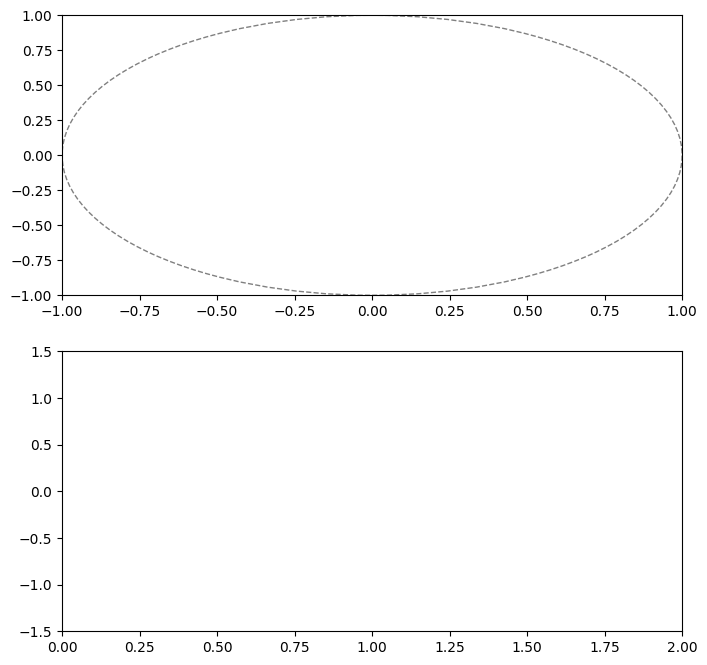

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define the mapping from the real line to the circle (covering map)
def real_to_circle(t):
    return np.exp(2 * np.pi * 1j * t)

# Define a loop in the circle (the map we want to lift)
def loop_in_circle(theta):
    return np.exp(1j * theta)

# Set up the figure and axis
fig, axs = plt.subplots(2, 1, figsize=(8, 8))
axs[0].set_xlim(-1, 1)
axs[0].set_ylim(-1, 1)
axs[1].set_xlim(0, 2)
axs[1].set_ylim(-1.5, 1.5)
circle_line, = axs[0].plot([], [], 'bo-')
real_line, = axs[1].plot([], [], 'ro-')

# Circle drawing for reference
circle = plt.Circle((0, 0), 1, fill=False, color='gray', linestyle='--')
axs[0].add_artist(circle)

# Initialization function for the animation
def init():
    circle_line.set_data([], [])
    real_line.set_data([], [])
    return circle_line, real_line

# Animation function which updates the plot
def animate(i):
    theta = 2 * np.pi * i / 100
    z = loop_in_circle(theta)
    t = i / 100.0

    # Update the circle plot
    x, y = z.real, z.imag
    circle_line.set_data([0, x], [0, y])
    
    # Update the real line plot
    real_line.set_data([0, t], [0, 1])
    
    axs[0].set_title("Map on Circle (S^1)")
    axs[1].set_title("Lifted Path on Real Line (R)")
    
    return circle_line, real_line

# Create animation
ani = FuncAnimation(fig, animate, init_func=init, frames=100, interval=200, blit=True)

plt.show()
